In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.feature as cf
import numpy as np
import os

In [2]:
# define paths
data_path = 'data'
output_path = 'output'

# set parent folder as working directory
os.chdir('..')
os.getcwd()

'c:\\Users\\isaldiviagonzatti\\Downloads\\gitFiles\\MScThesisCode\\FLP'

In [9]:
G = ox.graph.graph_from_bbox(11.2, 10.00, -83, -85.2, network_type = 'drive_service')
nodes = ox.graph_to_gdfs(G, edges=False)

In [55]:
results = pd.read_csv(os.path.join(output_path,'resultsOpti.csv'))

In [56]:
results

,facility,nodePAL,quantity
0,2683369498,1623183425,20762.0
1,2683369498,3279845497,968.0
2,2683369498,5260581064,965.0
3,2683369498,1088156051,25024.0
4,2683369498,3279862178,1782.0
...,...,...,...
1169,4131895232,6223986406,2712.0
1170,4131895232,9872692972,5304.0
1171,4131895232,4131895232,13954.0
1172,4131895232,4942868437,5286.0


In [57]:
results['facGeo'] = results.merge(nodes, left_on='facility',right_on = 'osmid', how='left')['geometry']
results['palGeo'] = results.merge(nodes, left_on='nodePAL',right_on = 'osmid', how='left')['geometry']

In [58]:
results

,facility,nodePAL,quantity,facGeo,palGeo
0,2683369498,1623183425,20762.0,POINT (-83.59517 10.27376),POINT (-83.58406 10.29359)
1,2683369498,3279845497,968.0,POINT (-83.59517 10.27376),POINT (-83.57291 10.18352)
2,2683369498,5260581064,965.0,POINT (-83.59517 10.27376),POINT (-83.60366 10.28602)
3,2683369498,1088156051,25024.0,POINT (-83.59517 10.27376),POINT (-83.58099 10.27069)
4,2683369498,3279862178,1782.0,POINT (-83.59517 10.27376),POINT (-83.58516 10.15032)
...,...,...,...,...,...
1169,4131895232,6223986406,2712.0,POINT (-84.41097 10.54495),POINT (-84.37924 10.60174)
1170,4131895232,9872692972,5304.0,POINT (-84.41097 10.54495),POINT (-84.42509 10.55448)
1171,4131895232,4131895232,13954.0,POINT (-84.41097 10.54495),POINT (-84.41097 10.54495)
1172,4131895232,4942868437,5286.0,POINT (-84.41097 10.54495),POINT (-84.41662 10.58121)


In [59]:
geoData =  gpd.GeoDataFrame(results)
geoFac = geoData.set_geometry('facGeo', crs= 'epsg:4326')

In [60]:
geoPal = geoData.set_geometry('palGeo', crs= geoFac.crs)
geoPal['quantity'] = geoPal['quantity']/1000 # to thousand tonnes

In [61]:
shpCR = gpd.read_file(os.path.join(data_path,"geoCR.geojson"))

In [62]:
geoPal.quantity.describe()

count    1174.000000
mean        3.927997
std         6.200824
min         0.041000
25%         0.525500
50%         1.773500
75%         4.604750
max        55.888000
Name: quantity, dtype: float64

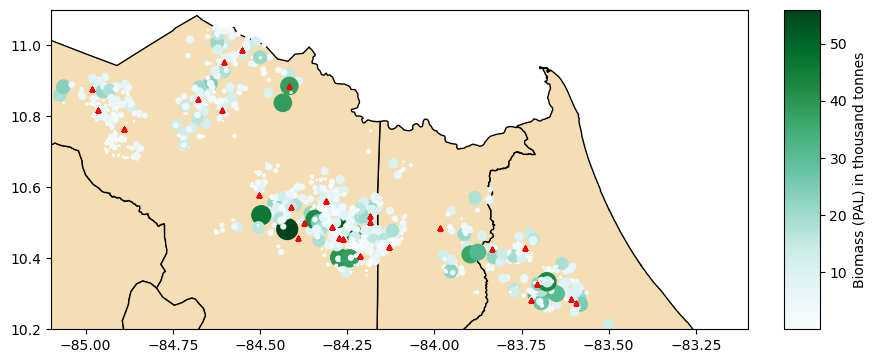

In [64]:
ax = shpCR.plot(color='wheat', edgecolor='black', figsize=(10, 10))

ax.set_ylim([10.2, 11.1])
ax.set_xlim([-85.1,-83.1])

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.3)

geoPal.plot(ax=ax, column = 'quantity', markersize = geoPal['quantity']*4, cmap='BuGn',
                legend=True,  cax=cax, 
                legend_kwds={'label': "Biomass (PAL) in thousand tonnes"} )

geoFac.plot( ax=ax, marker='^', color='red', markersize=8, label='Facilities')

# Show plot
plt.savefig(os.path.join(output_path,'resultsALL.pdf'), bbox_inches='tight')
plt.show()

In [24]:
# load pal data with polygons
pal = os.path.join(output_path,'polygonPAL.gpkg')
palPoint = gpd.read_file(pal) 

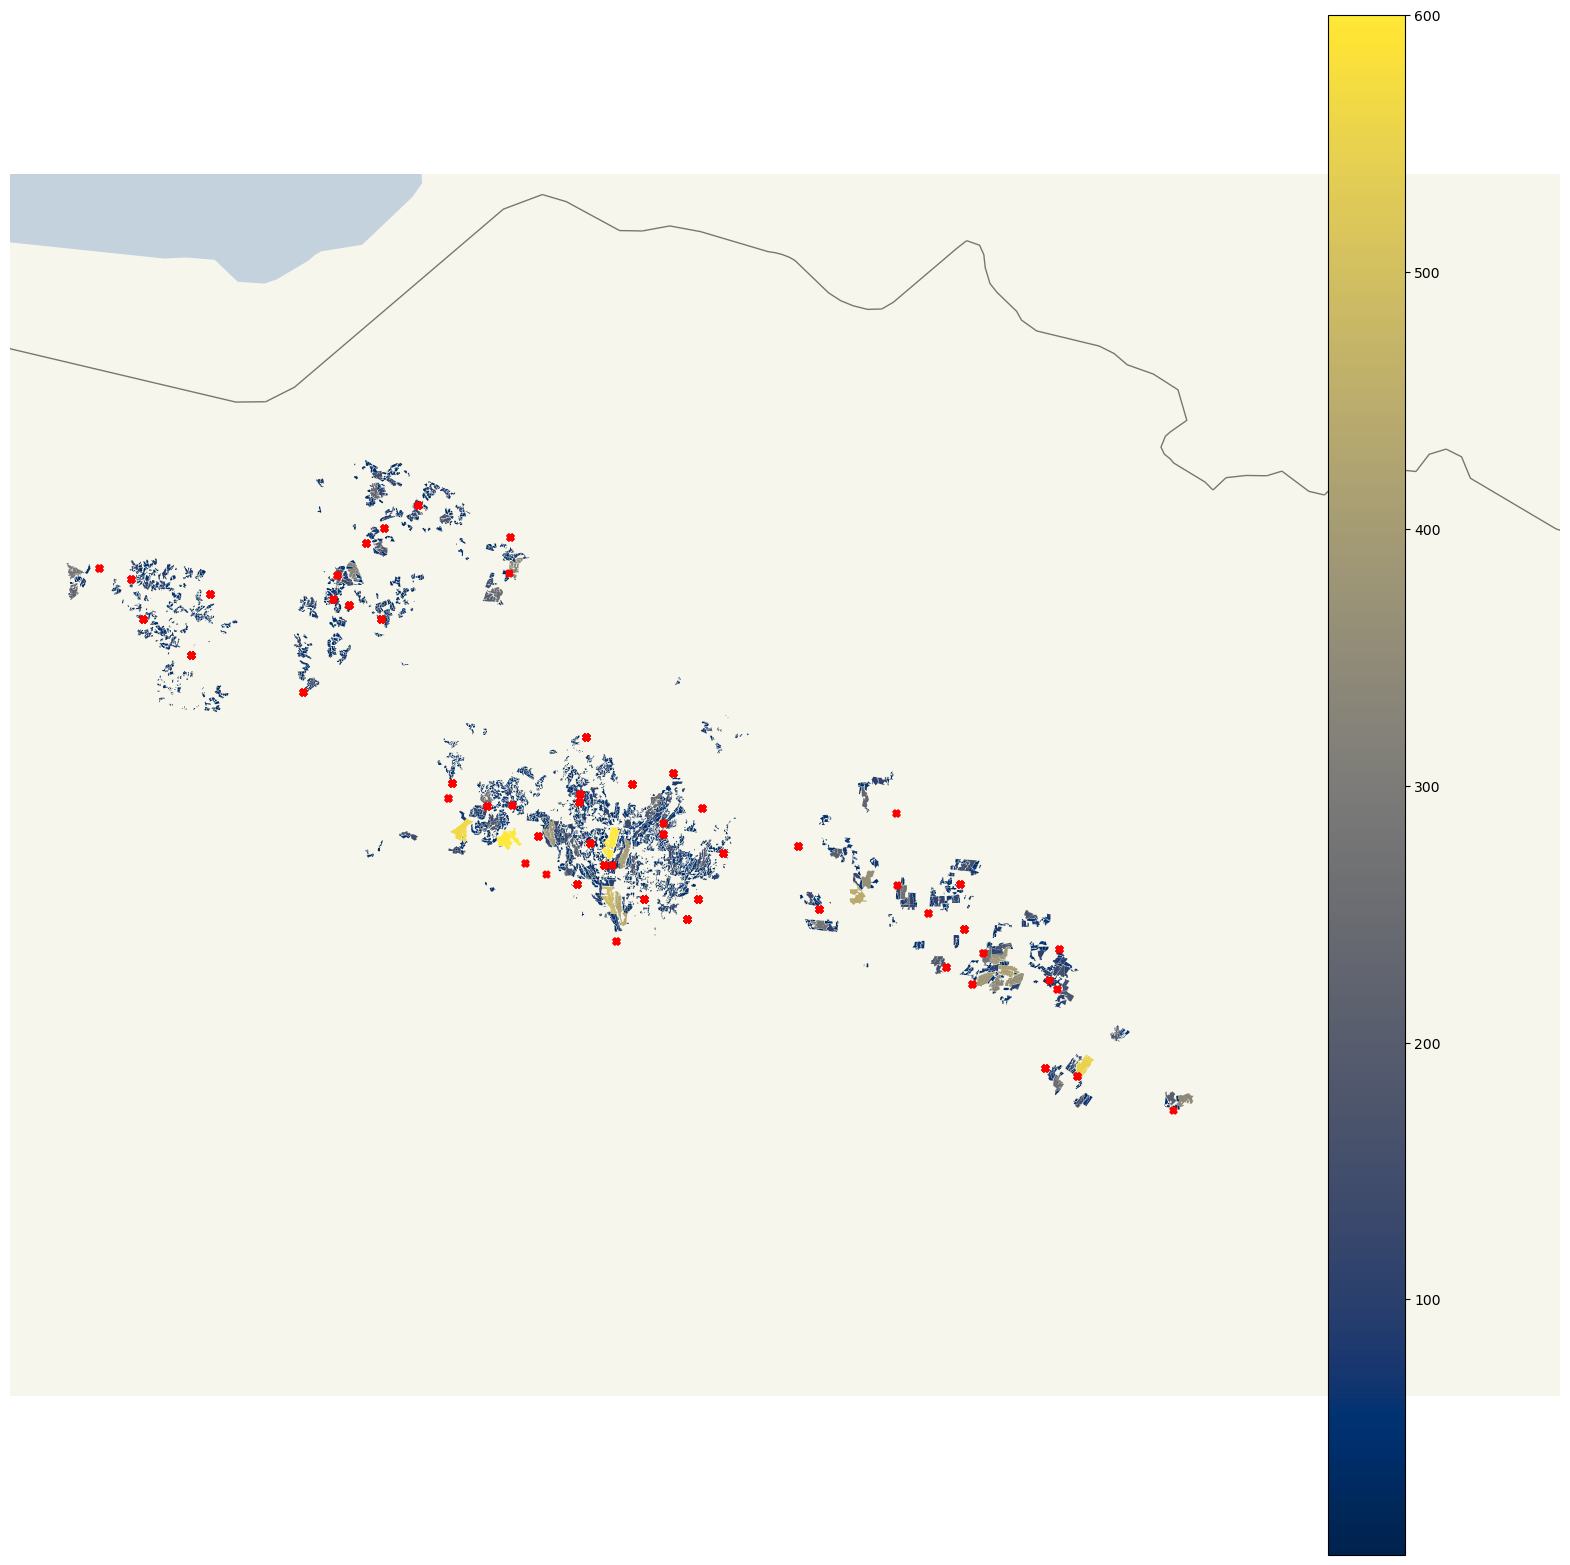

In [ ]:
bounds= palPoint.total_bounds
figure = plt.figure(figsize=(20,20))
ax = plt.axes(projection = ccrs.LambertConformal(), frameon=False)

ax.set_extent([-85.1,-84, 10.2, 11.00]) 

#ax.add_geometries(palPoint.geometry, crs=ccrs.PlateCarree(), zorder=5, edgecolor='green')

ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAKES)
#ax.add_feature(cf.OCEAN)
ax.add_feature(land)

ax = figure.add_subplot(projection = ccrs.LambertConformal(), frameon=False)

palPoint.plot(column='areaHa', cmap='cividis',
               ax=ax, legend=True,
               vmin=0.5, vmax=600)

geoFac.plot( ax=ax, marker='X', color='red', markersize=20, alpha=0.8, label='Facilities')


plt.show()